In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import FundamentalAnalysis as fa
import requests as req
from matplotlib.ticker import FuncFormatter

%matplotlib notebook

C:\Users\Rodolfo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Income Statement

### Profit

In [3]:
income_statement = fa.income_statement('KO', "c0c00c1cd114ca0ad0cf7227bb93c705", period="annual").T
income_statement.columns
income_statement[['operatingIncome', 'grossProfit']].head()

,operatingIncome,grossProfit
2020,8997000000,19581000000
2019,10086000000,22647000000
2018,9152000000,20086000000
2017,7755000000,22154000000
2016,8657000000,25398000000


In [4]:
income_statement.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period', 'revenue',
       'costOfRevenue', 'grossProfit', 'grossProfitRatio',
       'researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses',
       'sellingAndMarketingExpenses',
       'sellingGeneralAndAdministrativeExpenses', 'otherExpenses',
       'operatingExpenses', 'costAndExpenses', 'interestExpense',
       'depreciationAndAmortization', 'ebitda', 'ebitdaratio',
       'operatingIncome', 'operatingIncomeRatio',
       'totalOtherIncomeExpensesNet', 'incomeBeforeTax',
       'incomeBeforeTaxRatio', 'incomeTaxExpense', 'netIncome',
       'netIncomeRatio', 'eps', 'epsdiluted', 'weightedAverageShsOut',
       'weightedAverageShsOutDil', 'link', 'finalLink'],
      dtype='object')

In [162]:
# Retrieve in Excel file
income_statement_p = income_statement.T.iloc[:,:4]
income_statement_p.to_excel('Coca Cola Income Statement.xlsx')

In [217]:
api_key = 'c0c00c1cd114ca0ad0cf7227bb93c705'
url_link = 'https://financialmodelingprep.com/api/v3/income-statement-as-reported/KO?apikey={}'.format(api_key)
income_statement = pd.DataFrame.from_dict(req.get(url_link).json()).iloc[:4,:]
df_is = income_statement[['date','grossprofit', 'costofgoodsandservicessold','operatingincomeloss']].set_index('date')
df_is.index = pd.to_datetime(df_is.index, format =  '%Y-%m-%d').to_period('Y')
df_is = df_is.rename(columns = {'grossprofit': 'Gross Profit', 'costofgoodsandservicessold': 'Cost of Good Sold', 'operatingincomeloss': 'Operating Income'})
df_is

,Gross Profit,Cost of Good Sold,Operating Income
date,,,
2020,1.958100e+10,1.343300e+10,8.997000e+09
2019,2.264700e+10,1.461900e+10,1.008600e+10
2018,2.008600e+10,1.177000e+10,8.700000e+09
2017,2.215400e+10,NaN,7.501000e+09


<IPython.core.display.Javascript object>


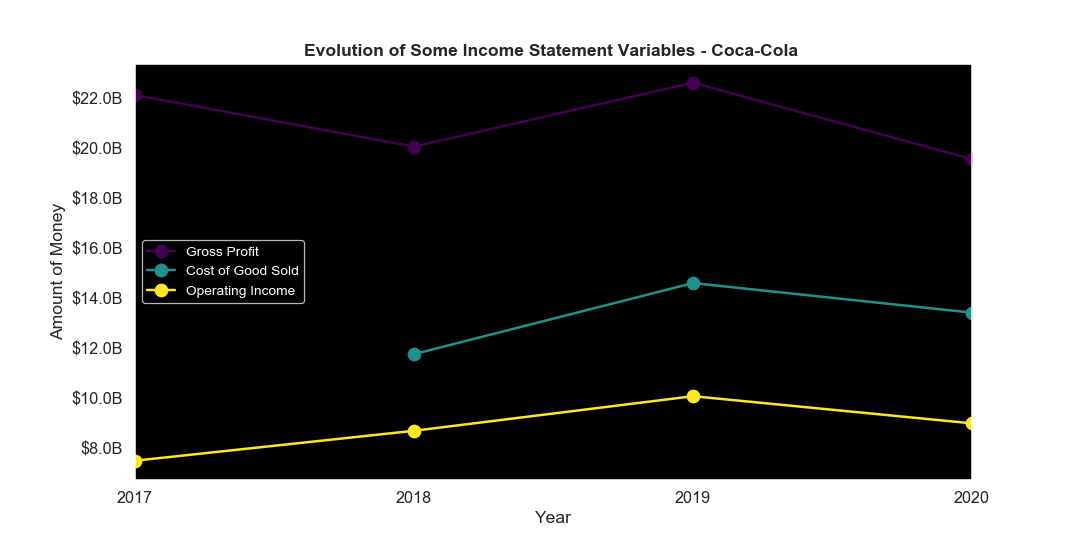

In [187]:
#Style
sea.set( rc = {'axes.facecolor':'black', 'axes.grid': False} )
#sea.set_style('darkgrid', {'axes.grid': True})

#PLot
df_is.plot( kind = 'line', marker = 'o', figsize = (12,6), linewidth = 2, markersize = 10, colormap = 'viridis')

plt.xlabel('Year', fontsize = 14)
plt.ylabel('Amount of Money',  fontsize = 14)
plt.title('Evolution of Some Income Statement Variables - Coca-Cola ',  fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
legend = plt.legend(loc = 'best', frameon = True, framealpha = 0.9)
plt.setp(legend.get_texts(), color = 'white')


#Changinf Scientific abreviation
def billions(x, pos):
    return '$%1.1fB' % (x*1e-9)

formatter = FuncFormatter(billions)

plt.gca().yaxis.set_major_formatter(formatter)


#Save Fig
#plt.savefig('Income Statement Variables.PNG', quality = 97, optimize = True)

### Operating Expenses

In [204]:
df_expenses = income_statement[['researchAndDevelopmentExpenses', 'generalAndAdministrativeExpenses','sellingAndMarketingExpenses']].iloc[:4,:].iloc[::-1]
df_expenses

,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses
2017,0,5281000000,7215000000
2018,0,4493000000,5814000000
2019,0,4984000000,7119000000
2020,0,4316000000,5415000000


In [241]:
list(map(lambda x: float(x) + 0.5,list(df_expenses.index)))

[2017.5, 2018.5, 2019.5, 2020.5]

<IPython.core.display.Javascript object>


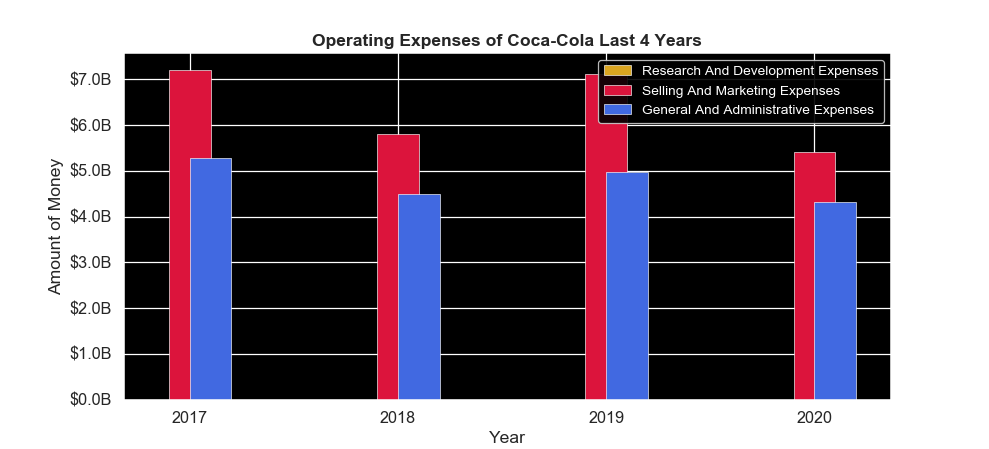

In [243]:
#Style
sea.set(rc = {'axes.facecolor':'black', 'axes.grid': True} )

#Plot
plt.figure()

plt.bar(x= df_expenses.index, width = 0.3, height = df_expenses['researchAndDevelopmentExpenses'], linewidth = 0.5,  color = 'goldenrod',
        label = 'Research And Development Expenses')

plt.bar(x= df_expenses.index , width = 0.2, height = df_expenses['sellingAndMarketingExpenses'],linewidth = 0.5,  color ='crimson' ,
        label = 'Selling And Marketing Expenses')
plt.bar(x= df_expenses.index , width = 0.2,  align = 'edge',  height = df_expenses['generalAndAdministrativeExpenses'],linewidth = 0.5,  color = 'royalblue',
        label = 'General And Administrative Expenses')


#Labels
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Amount of Money',  fontsize = 14)
plt.title('Operating Expenses of Coca-Cola Last 4 Years',  fontsize = 14, fontweight = 'bold')
legend = plt.legend(loc = 'best', frameon = True, framealpha = 0.9)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)


#Changinf Scientific abreviation to Billion unit
def billions(x, pos):
    return '$%1.1fB' % (x*1e-9)

formatter = FuncFormatter(billions)

plt.gca().yaxis.set_major_formatter(formatter)


#setting
plt.gcf().set_size_inches(11, 5)
plt.gcf().set_dpi(100)
plt.setp(legend.get_texts(), color = 'white')

#Save Fig
plt.savefig('Operating Expenses of Coca-Cola Last 4 Years', quality = 97, optimize = True)

### Returns

In [221]:
df_div_his = cash_flow[['dividendsPaid']]
df_div_his

stock_data = fa.stock_data_detailed(ticker = 'ko', interval="3mo")
stock_data

,low,close,volume,high,open,adjclose
1985-01-01,1.239583,1.458333,9.701808e+08,1.463542,1.294271,0.606954
1985-04-01,1.375000,1.445313,1.125571e+09,1.505208,1.458333,0.608343
1985-07-01,1.401042,1.453125,1.129546e+09,1.559896,1.445313,0.618287
1985-10-01,1.440104,1.760417,9.450576e+08,1.838542,1.453125,0.757156
1986-01-01,1.598958,2.192708,8.952720e+08,2.291667,1.760417,0.951659
...,...,...,...,...,...,...
2021-01-01,48.110001,52.709999,1.210459e+09,54.630001,54.270000,51.495304
2021-04-01,52.290001,54.110001,8.865686e+08,56.480000,52.959999,53.303043
2021-07-01,52.430000,52.470001,8.482042e+08,57.560001,54.340000,52.076969
2021-10-01,NaN,NaN,NaN,NaN,NaN,NaN


## Balance Sheet

In [16]:
balance_sheet = fa.balance_sheet_statement('KO', "c0c00c1cd114ca0ad0cf7227bb93c705", period="annual")
df_bs = balance_sheet.T
df_bs.head()

,reportedCurrency,fillingDate,acceptedDate,period,cashAndCashEquivalents,shortTermInvestments,cashAndShortTermInvestments,netReceivables,inventory,otherCurrentAssets,...,retainedEarnings,accumulatedOtherComprehensiveIncomeLoss,othertotalStockholdersEquity,totalStockholdersEquity,totalLiabilitiesAndStockholdersEquity,totalInvestments,totalDebt,netDebt,link,finalLink
2020,USD,2021-02-25,2021-02-25 13:47:17,FY,6795000000,4119000000,10914000000,3144000000,3266000000,1916000000,...,66555000000,-14601000000,0,21284000000,87296000000,24204000000,42793000000,35998000000,https://www.sec.gov/Archives/edgar/data/21344/...,https://www.sec.gov/Archives/edgar/data/21344/...
2019,USD,2020-02-24,2020-02-24 16:08:17,FY,6480000000,4695000000,11175000000,3971000000,3379000000,1886000000,...,65855000000,-13544000000,0,21098000000,86381000000,24574000000,42763000000,36283000000,https://www.sec.gov/Archives/edgar/data/21344/...,https://www.sec.gov/Archives/edgar/data/21344/...
2018,USD,2019-02-21,2019-02-21 16:55:42,FY,8926000000,7038000000,15964000000,3396000000,2766000000,8508000000,...,63234000000,-12814000000,0,19058000000,83216000000,27312000000,43555000000,34629000000,https://www.sec.gov/Archives/edgar/data/21344/...,https://www.sec.gov/Archives/edgar/data/21344/...
2017,USD,2018-02-23,2018-02-23 11:20:20,FY,6006000000,14669000000,20675000000,3667000000,2655000000,9548000000,...,60430000000,-10305000000,0,18977000000,87896000000,36621000000,47685000000,41679000000,https://www.sec.gov/Archives/edgar/data/21344/...,https://www.sec.gov/Archives/edgar/data/21344/...
2016,USD,2017-02-24,2017-02-24 11:34:47,FY,8555000000,13646000000,22201000000,3856000000,2675000000,5278000000,...,65502000000,-11205000000,0,23220000000,87270000000,30895000000,45709000000,37154000000,https://www.sec.gov/Archives/edgar/data/21344/...,https://www.sec.gov/Archives/edgar/data/21344/...


In [167]:
balance_sheet.T.iloc[:,:4].to_excel('Coca Cola Balance Sheet.xlsx')

In [55]:
df_bs.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period',
       'cashAndCashEquivalents', 'shortTermInvestments',
       'cashAndShortTermInvestments', 'netReceivables', 'inventory',
       'otherCurrentAssets', 'totalCurrentAssets', 'propertyPlantEquipmentNet',
       'goodwill', 'intangibleAssets', 'goodwillAndIntangibleAssets',
       'longTermInvestments', 'taxAssets', 'otherNonCurrentAssets',
       'totalNonCurrentAssets', 'otherAssets', 'totalAssets',
       'accountPayables', 'shortTermDebt', 'taxPayables', 'deferredRevenue',
       'otherCurrentLiabilities', 'totalCurrentLiabilities', 'longTermDebt',
       'deferredRevenueNonCurrent', 'deferredTaxLiabilitiesNonCurrent',
       'otherNonCurrentLiabilities', 'totalNonCurrentLiabilities',
       'otherLiabilities', 'totalLiabilities', 'commonStock',
       'retainedEarnings', 'accumulatedOtherComprehensiveIncomeLoss',
       'othertotalStockholdersEquity', 'totalStockholdersEquity',
       'totalLiabilitiesAndStockhol

In [52]:
df_plot = df_bs[['totalAssets','totalLiabilities', 'totalStockholdersEquity']].iloc[:,:]
df_plot

,totalAssets,totalLiabilities,totalStockholdersEquity
2020,87296000000,66012000000,21284000000
2019,86381000000,65283000000,21098000000
2018,83216000000,64158000000,19058000000
2017,87896000000,68919000000,18977000000


In [48]:
df_plot.index[::-1]

Index(['2017', '2018', '2019'], dtype='object')

<IPython.core.display.Javascript object>


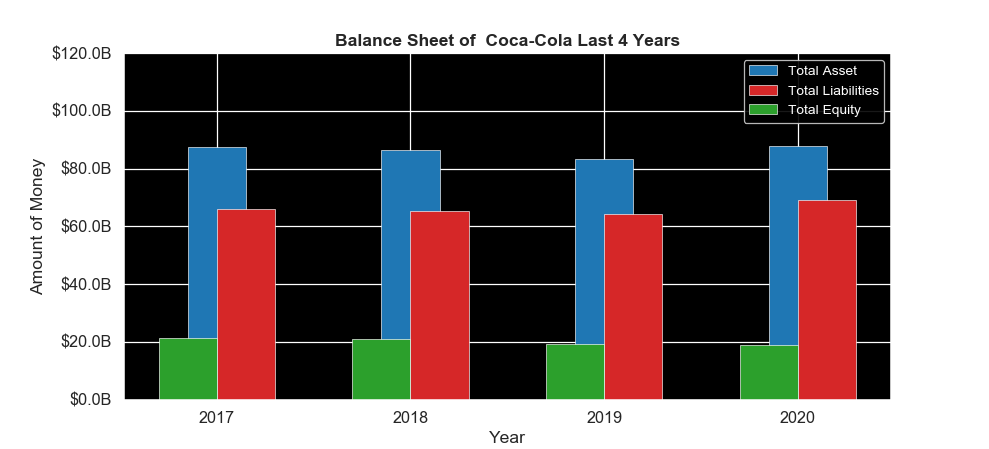

In [248]:
#Style
sea.set(rc = {'axes.facecolor':'black', 'axes.grid': True} )

#Plot
plt.figure()

plt.bar(x= df_plot.index[::-1] , width = 0.3, height = df_plot['totalAssets'], linewidth = 0.5,  color = 'tab:blue', label = 'Total Asset')
plt.bar(x= df_plot.index[::-1] , width = 0.3, align = 'edge', height = df_plot['totalLiabilities'],linewidth = 0.5,  color = 'tab:red', label = 'Total Liabilities')
plt.bar(x= df_plot.index[::-1] , width = -0.3, align = 'edge', height = df_plot['totalStockholdersEquity'],linewidth = 0.5,  color ='tab:green' , label = 'Total Equity')


#Labels
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Amount of Money',  fontsize = 14)
plt.title('Balance Sheet of  Coca-Cola Last 4 Years',  fontsize = 14, fontweight = 'bold')
legend = plt.legend(loc = 'best', frameon = True, framealpha = 0.9)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.gca().set_ylim([0, 120000000000])


#Changinf Scientific abreviation to Billion unit
def billions(x, pos):
    return '$%1.1fB' % (x*1e-9)

formatter = FuncFormatter(billions)

plt.gca().yaxis.set_major_formatter(formatter)


#setting
plt.gcf().set_size_inches(11, 5)
plt.gcf().set_dpi(100)
plt.setp(legend.get_texts(), color = 'white')

#Save Fig
plt.savefig('Balance Sheet over last 4 year.PNG', quality = 97, optimize = True)

## Cash Flow Statement

### Depreciation and Amortization

In [126]:
cash_flow = fa.cash_flow_statement('KO', "c0c00c1cd114ca0ad0cf7227bb93c705", period="annual").T
cash_flow.columns

Index(['reportedCurrency', 'fillingDate', 'acceptedDate', 'period',
       'netIncome', 'depreciationAndAmortization', 'deferredIncomeTax',
       'stockBasedCompensation', 'changeInWorkingCapital',
       'accountsReceivables', 'inventory', 'accountsPayables',
       'otherWorkingCapital', 'otherNonCashItems',
       'netCashProvidedByOperatingActivities',
       'investmentsInPropertyPlantAndEquipment', 'acquisitionsNet',
       'purchasesOfInvestments', 'salesMaturitiesOfInvestments',
       'otherInvestingActivites', 'netCashUsedForInvestingActivites',
       'debtRepayment', 'commonStockIssued', 'commonStockRepurchased',
       'dividendsPaid', 'otherFinancingActivites',
       'netCashUsedProvidedByFinancingActivities',
       'effectOfForexChangesOnCash', 'netChangeInCash', 'cashAtEndOfPeriod',
       'cashAtBeginningOfPeriod', 'operatingCashFlow', 'capitalExpenditure',
       'freeCashFlow', 'link', 'finalLink'],
      dtype='object')

In [171]:
cash_flow.T.iloc[:,:4].to_excel('Coca Cola Cash Flow Statement.xlsx')

In [143]:
df_depr = cash_flow['depreciationAndAmortization'].iloc[:4].iloc[::-1]
df_depr

2017    1260000000
2018    1086000000
2019    1365000000
2020    1536000000
Name: depreciationAndAmortization, dtype: object

<IPython.core.display.Javascript object>


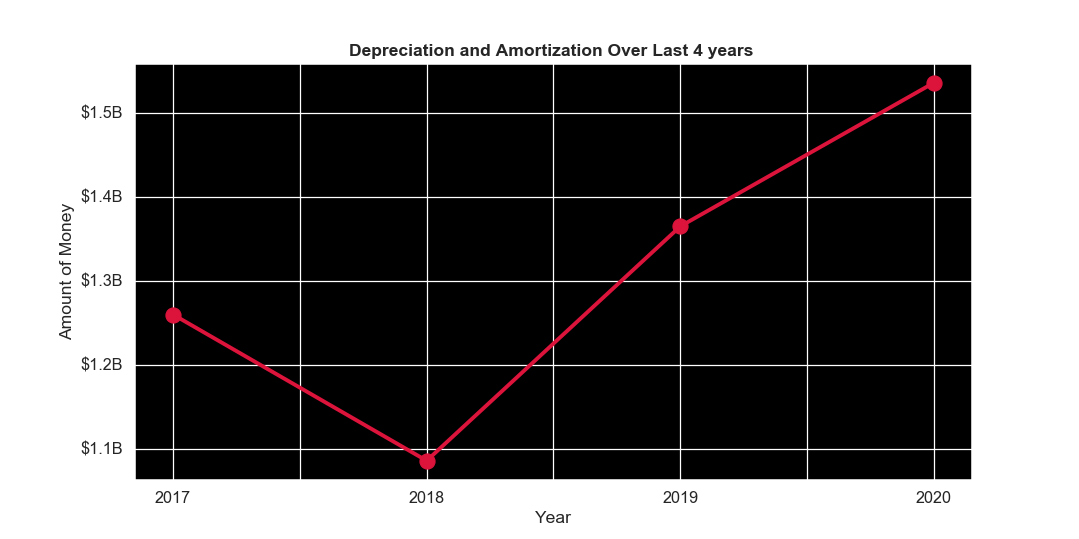

In [145]:
#Plott
plt.figure()
df_depr.plot( kind = 'line', marker = 'o', figsize = (12,6), linewidth = 3.1, markersize = 12, color = 'crimson')

plt.xlabel('Year', fontsize = 14)
plt.ylabel('Amount of Money',  fontsize = 14)
plt.title('Depreciation and Amortization Over Last 4 years ',  fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
#legend = plt.legend(loc = 'best', frameon = True, framealpha = 0.9)
#plt.setp(legend.get_texts(), color = 'white')


#Changinf Scientific abreviation
def billions(x, pos):
    return '$%1.1fB' % (x*1e-9)

formatter = FuncFormatter(billions)

plt.gca().yaxis.set_major_formatter(formatter)


#Save Fig
plt.savefig('Depreciation.PNG', quality = 97, optimize = True)

### Operatin  Cash-Flow

In [180]:
df_op = cash_flow[['operatingCashFlow', 'freeCashFlow']].iloc[:4,:].iloc[::-1].rename(columns = {'operatingCashFlow': 'Operating Cash-Flow', 'freeCashFlow': 'Free Cash-Flow' })
df_op

,Operating Cash-Flow,Free Cash-Flow
2017,7106000000,5431000000
2018,7627000000,6280000000
2019,10471000000,8417000000
2020,9844000000,8667000000


<IPython.core.display.Javascript object>


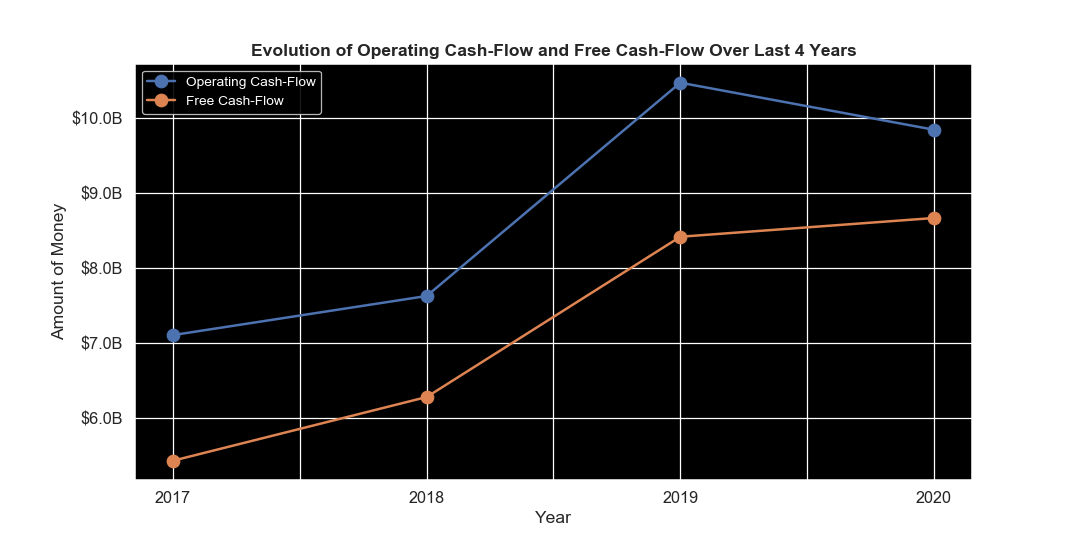

In [188]:
#Style
sea.set( rc = {'axes.facecolor':'black', 'axes.grid': True} )
#sea.set_style('darkgrid', {'axes.grid': True})

#PLot
df_op.plot( kind = 'line', marker = 'o', figsize = (12,6), linewidth = 2, markersize = 10)

plt.xlabel('Year', fontsize = 14)
plt.ylabel('Amount of Money',  fontsize = 14)
plt.title('Evolution of Operating Cash-Flow and Free Cash-Flow Over Last 4 Years',  fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
legend = plt.legend(loc = 'best', frameon = True, framealpha = 0.9)
plt.setp(legend.get_texts(), color = 'white')


#Changinf Scientific abreviation
def billions(x, pos):
    return '$%1.1fB' % (x*1e-9)

formatter = FuncFormatter(billions)

plt.gca().yaxis.set_major_formatter(formatter)


#Save Fig
plt.savefig('Operating Cash Flow.PNG', quality = 97, optimize = True)

### Dividends

In [194]:
df_div = cash_flow['dividendsPaid'].iloc[:4].iloc[::-1].apply(lambda x: np.abs(x))
df_div

2017    6320000000
2018    6644000000
2019    6845000000
2020    7047000000
Name: dividendsPaid, dtype: int64

<IPython.core.display.Javascript object>


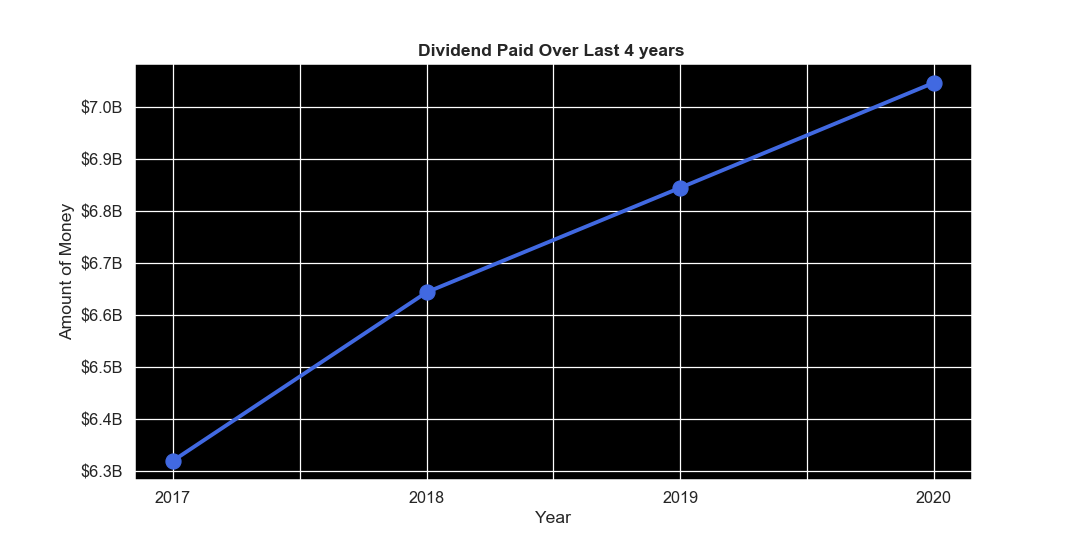

In [196]:
#Plott
plt.figure()
df_div.plot( kind = 'line', marker = 'o', figsize = (12,6), linewidth = 3.1, markersize = 12, color = 'royalblue')

plt.xlabel('Year', fontsize = 14)
plt.ylabel('Amount of Money',  fontsize = 14)
plt.title('Dividend Paid Over Last 4 years ',  fontsize = 14, fontweight = 'bold')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

#Changinf Scientific abreviation
def billions(x, pos):
    return '$%1.1fB' % (x*1e-9)

formatter = FuncFormatter(billions)

plt.gca().yaxis.set_major_formatter(formatter)


#Save Fig
plt.savefig('Dividends Paid.PNG', quality = 97, optimize = True)